In [1]:
!pip install xgboost

In [2]:
import pandas as pd
df=pd.read_csv("/quora_duplicate_questions.csv")
df.head(100)


,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,3,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0.0
4,4,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1.0
...,...,...,...,...,...,...,...
95,95,111,223,224,Is USA the most powerful country of the world?,Why is the USA the most powerful country of th...,0.0
96,96,112,225,226,How do you obtain an instant ulcer pain relief?,What is better for a low back pain: heat or ice?,0.0
97,97,113,227,228,What do you think China food?,How do you think of Chinese food?,1.0
98,98,114,229,230,What does taking advantage of someone mean?,Is it worse to take advantage of someone or be...,0.0


In [3]:
df.shape

(30673, 7)

In [4]:
df.info()
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30673 entries, 0 to 30672
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         30673 non-null  int64  
 1   id            30673 non-null  int64  
 2   qid1          30673 non-null  int64  
 3   qid2          30673 non-null  int64  
 4   question1     30673 non-null  object 
 5   question2     30672 non-null  object 
 6   is_duplicate  30672 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.6+ MB
       index     id   qid1   qid2  \
30668  30668  35979  71690  71691   
30669  30669  35980  71692  71693   
30670  30670  35982  71696  71697   
30671  30671  35983  71698  71699   
30672  30672  35984  71700  71701   

                                               question1  \
30668  Are white people more nationalistic than other...   
30669  I feel like I'm constantly on the edge of a me...   
30670  Which is the best badminton racke

In [5]:
df.isnull().sum()

index           0
id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    1
dtype: int64

is_duplicate
0.0    18450
1.0    12222
Name: count, dtype: int64
is_duplicate
0.0    60.0
1.0    40.0
Name: count, dtype: float64


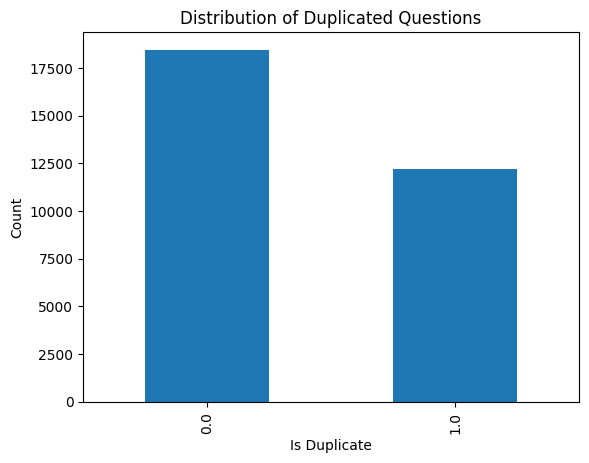

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print value counts for duplicated questions
print(df['is_duplicate'].value_counts())

# Calculate percentage of duplicated questions
percentage_duplicated = (df['is_duplicate'].value_counts() / df['is_duplicate'].count()) * 100
print(round(percentage_duplicated))

# Create a bar plot
df['is_duplicate'].value_counts().plot(kind='bar')
plt.xlabel("Is Duplicate")
plt.ylabel("Count")
plt.title("Distribution of Duplicated Questions")
plt.show()


In [7]:
print(df.duplicated().sum())

0


In [8]:
#Rpeated Questions
import numpy as np
qid=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("There are {} unique questions".format(np.unique(qid).shape[0]))
x=qid.value_counts()>1
print('Number of questions are getting repeated', x[x].shape[0])

There are 61156 unique questions
Number of questions are getting repeated 175


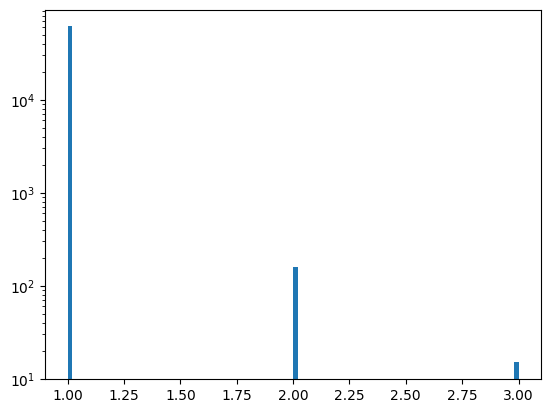

In [9]:
plt.hist(qid.value_counts().values, bins=100)
plt.yscale('log')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
new_df=df[['question1','question2']].sample(30000)
# Assuming df is your DataFrame containing 'question1' and 'question2' columns
questions = list(new_df['question1'].fillna('')) + list(new_df['question2'].fillna(''))

cv = CountVectorizer(max_features=1000)
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(), 2)


In [24]:
temp_df1=pd.DataFrame(q1_array,index=new_df.index)
temp_df2=pd.DataFrame(q2_array, index=new_df.index)
temp_df= pd.concat((temp_df1,temp_df2),axis=1)
temp_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
11490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
filtered_is_duplicate = df.loc[new_df.index]['is_duplicate']
temp_df['is_duplicate']=filtered_is_duplicate
temp_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,is_duplicate
11490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
19623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1242,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
10227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
16276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0.0
6439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
23080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(temp_df,filtered_is_duplicate, test_size=0.3, random_state=142)

xgb = XGBClassifier()
param_grid = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4]
}

# Rename columns to have unique names
X_train.columns = [f'feature_{i}' for i in range(len(X_train.columns))]

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [3, 4],
                         'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

In [33]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
# Ensure that the feature names in the test data match the feature names used during training
X_test.columns = X_train.columns

# Convert y_test to binary labels (0 or 1)
y_test_binary = (y_test > 0.5).astype(int)

# Evaluate on test set using the best model found by GridSearchCV
test_accuracy = grid_search.score(X_test, y_test_binary)
print("Test Accuracy: ", test_accuracy)



Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Score:  1.0
Test Accuracy:  0.9998888888888889


In [35]:
#Define base estimator (XGBoost classifier)
base_estimator = XGBClassifier(**grid_search.best_params_)

# Define bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.01, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=3,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=50, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                  random_state=42)

In [47]:
# Convert y_test to binary labels (0 or 1)
y_test_binary = (y_test > 0.5).astype(int)

# Evaluate the bagging classifier on the test set
test_accuracy_bagging = bagging_clf.score(X_test, y_test_binary)
print("Test Accuracy (Bagging): ", test_accuracy_bagging)


Test Accuracy (Bagging):  0.9998888888888889


In [48]:
# Check if X_new is empty
if not X_new.empty:
    # Make probability estimates using the bagging classifier
    probabilities = bagging_clf.predict_proba(X_new)

    # Print the probability estimates
    print(probabilities)
else:
    print("X_new is empty. Please provide data with at least one sample.")





X_new is empty. Please provide data with at least one sample.


In [51]:
import pickle

# Assuming 'bagging_clf' is your trained model
model_file_path = 'bagging_classifier_model.pkl'  # Specify the file path where you want to save the model

# Save the trained model to a file using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(bagging_clf, file)


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import pickle

# Assuming 'bagging_clf' is your trained model
model_file_path = '/content/drive/My Drive/bagging_classifier_model.pkl'  # Specify the file path in your Google Drive

# Save the trained model to a file using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(bagging_clf, file)
